<a href="https://colab.research.google.com/github/VenkySomepalli/edtech_deploy/blob/main/Edtech_course_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # EDTECH course cost prediction.

CRISP-ML(Q) Methodology
 * Business and Data understanding
 * Data preparation(Data Engineering)
 * Model Building(Machine Learning)
 * Model Evaluation and Tunning
 * Deployment
 * Monitoring and Maintenance

# Stage 1: Business Understanding Project Overview

* The project aims to be predict the course price of Edtech companies.
* Collection of data respected fields(less data(real) occured these area).

# * Business Objectives *

* Maximize the course cost.
* Minimize the Maintenance cost.

# * Constraints *

* The model my be impacted by infrastructure cost, trainer cost ....
* Students enrollments, palcements ......

# Load the Edtech_course data to predict the course price.

# Loading data form MySQL server DataBase.

In [ ]:
import mysql.connector
#establishing the connection
conn = mysql.connector.connect(
   user='root', password='Venky@1985', host='localhost', database='sql_intro')


#Creating a cursor object using the cursor() method
cursor = conn.cursor()

#Retrieving single row
sql = '''SELECT * from MOCK_DATA'''

#Executing the query
cursor.execute(sql)

#Fetching 1st row from the table
result = cursor.fetchall();
print(result)

"""#Closing the connection
conn.close()"""
import pandas as pd
data = pd.DataFrame(result, columns = ['s.no', 'Institute', 'Subject', 'Location', 'Trainer_Qualification',
       'Online_classes', 'Offline_classes', 'Trainer_experiance',
       'Course_level', 'Course_hours', 'Course_rating', 'Rental_permises',
       'Trainer_slary', 'Maintaince_cost', 'Non_teaching_staff_salary',
       'Placements', 'Certificate', 'Price'])

[(1, 'Datatrain', 'ProjectManagement', 'Delhi', 'Doctorate', 'Yes', 'Yes', 'advanced', 'Yes', 'Yes', 19, 192, 5, 145, 722, 140, 205, 1419), (2, 'Datatrain', 'DataScience', 'Hyderabad', 'Graduate', 'Yes', 'no', 'advanced', 'No', 'Yes', 9, 94, 2, 68, 454, 70, 116, 746), (3, 'Guvi', 'python', 'Chennai', 'UnderGraduate', 'no', 'no', 'advanced', 'Yes', 'Yes', 15, 154, 4, 112, 641, 118, 179, 1121), (4, 'innomatics', 'DigitalTransformation', 'Ahmedabad', 'Doctorate', 'Yes', 'Yes', 'intermediate', 'No', 'Yes', 18, 182, 5, 130, 729, 132, 108, 1341), (5, 'Datatrain', 'DigitalTransformation', 'Pune', 'UnderGraduate', 'Yes', 'Yes', 'advanced', 'No', 'Yes', 6, 75, 2, 43, 349, 45, 88, 512), (6, 'Datatrain', 'python', 'Ahmedabad', 'UnderGraduate', 'no', 'Yes', 'beginer', 'Yes', 'Yes', 11, 115, 3, 84, 510, 80, 135, 879), (7, '360DigiTMG', 'BigData', 'Pune', 'UnderGraduate', 'no', 'no', 'beginer', 'Yes', 'Yes', 6, 63, 2, 37, 297, 40, 76, 429), (8, 'Edureka', 'ArtificialIntelligence', 'Kanpour', 'Doctor

In [ ]:
data 

,s.no,Institute,Subject,Location,Trainer_Qualification,Online_classes,Offline_classes,Trainer_experiance,Course_level,Course_hours,Course_rating,Rental_permises,Trainer_slary,Maintaince_cost,Non_teaching_staff_salary,Placements,Certificate,Price
0,1,Datatrain,ProjectManagement,Delhi,Doctorate,Yes,Yes,advanced,Yes,Yes,19,192,5,145,722,140,205,1419
1,2,Datatrain,DataScience,Hyderabad,Graduate,Yes,no,advanced,No,Yes,9,94,2,68,454,70,116,746
2,3,Guvi,python,Chennai,UnderGraduate,no,no,advanced,Yes,Yes,15,154,4,112,641,118,179,1121
3,4,innomatics,DigitalTransformation,Ahmedabad,Doctorate,Yes,Yes,intermediate,No,Yes,18,182,5,130,729,132,108,1341
4,5,Datatrain,DigitalTransformation,Pune,UnderGraduate,Yes,Yes,advanced,No,Yes,6,75,2,43,349,45,88,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,521,Edureka,CloudComputing,Delhi,Graduate,no,Yes,intermediate,Yes,Yes,4,66,1,29,269,30,69,435
521,522,Edx,FullstackDataScience,Hyderabad,Doctorate,no,no,beginer,Yes,Yes,20,195,5,147,784,146,220,1462
522,523,ExcelR,DigitalTransformation,Delhi,Graduate,no,Yes,intermediate,Yes,Yes,1,42,1,16,212,16,95,601
523,524,Datatrain,CloudComputing,Pune,UnderGraduate,no,no,beginer,No,Yes,5,68,1,31,275,32,71,446


## OR Load data from local computer

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MOCK_DATA.csv to MOCK_DATA.csv


In [ ]:
import pandas as pd
data = pd.read_csv("MOCK_DATA.csv")

In [ ]:
data.head(10)
# Showing top 10 rows and all the columns in the dataset.

,s.no,Institute,Subject,Location,Trainer_Qualification,Online_classes,Offline_classes,Course_level,Placements,Certificate,Trainer_experiance,Course_hours,Course_rating,Rental_permises,Trainer_slary,Maintaince_cost,Non_teaching_staff_salary,Price
0,1,Datatrain,ProjectManagement,Delhi,Doctorate,Yes,Yes,advanced,Yes,Yes,19,192,5,145,722,140,205,1419
1,2,Datatrain,DataScience,Hyderabad,Graduate,Yes,no,advanced,No,Yes,9,94,2,68,454,70,116,746
2,3,Guvi,python,Chennai,UnderGraduate,no,no,advanced,Yes,Yes,15,154,4,112,641,118,179,1121
3,4,innomatics,DigitalTransformation,Ahmedabad,Doctorate,Yes,Yes,intermediate,No,Yes,18,182,5,130,729,132,108,1341
4,5,Datatrain,DigitalTransformation,Pune,UnderGraduate,Yes,Yes,advanced,No,Yes,6,75,2,43,349,45,88,512
5,6,Datatrain,python,Ahmedabad,UnderGraduate,no,Yes,beginer,Yes,Yes,11,115,3,84,510,80,135,879
6,7,360DigiTMG,BigData,Pune,UnderGraduate,no,no,beginer,Yes,Yes,6,63,2,37,297,40,76,429
7,8,Edureka,ArtificialIntelligence,Kanpour,Doctorate,no,Yes,advanced,Yes,Yes,6,70,2,42,315,46,80,481
8,9,Udemy,BigData,Bengaluru,Doctorate,no,no,beginer,Yes,Yes,6,78,2,51,356,51,95,618
9,10,Coursera,Dataanalysis,Kanpour,Graduate,Yes,Yes,advanced,Yes,Yes,6,67,2,39,310,43,78,463


In [ ]:
data.info()
# Information about the null, data type and memory of the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   s.no                       525 non-null    int64 
 1   Institute                  525 non-null    object
 2   Subject                    525 non-null    object
 3   Location                   525 non-null    object
 4   Trainer_Qualification      525 non-null    object
 5   Online_classes             525 non-null    object
 6   Offline_classes            525 non-null    object
 7   Course_level               525 non-null    object
 8   Placements                 525 non-null    object
 9   Certificate                525 non-null    object
 10  Trainer_experiance         525 non-null    int64 
 11  Course_hours               525 non-null    int64 
 12  Course_rating              525 non-null    int64 
 13  Rental_permises            525 non-null    int64 
 14  Trainer_sl

In [ ]:
data.describe()
# Statistical information about the data.

,s.no,Trainer_experiance,Course_hours,Course_rating,Rental_permises,Trainer_slary,Maintaince_cost,Non_teaching_staff_salary,Price
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000
mean,263.000000,10.790476,119.563810,2.920000,82.632381,506.112381,84.020952,136.615238,895.992381
std,151.698715,5.515930,47.492609,1.217431,39.147891,174.455130,38.975838,50.668250,343.817128
min,1.000000,1.000000,40.000000,1.000000,15.000000,200.000000,15.000000,50.000000,302.000000
25%,132.000000,6.000000,78.000000,2.000000,49.000000,354.000000,51.000000,94.000000,602.000000
50%,263.000000,11.000000,118.000000,3.000000,84.000000,515.000000,85.000000,137.000000,889.000000
75%,394.000000,15.000000,165.000000,4.000000,118.000000,653.000000,119.000000,181.000000,1192.000000
max,525.000000,20.000000,200.000000,5.000000,150.000000,800.000000,150.000000,225.000000,1499.000000


In [ ]:
data.columns
# view the columns

Index(['s.no', 'Institute', 'Subject', 'Location', 'Trainer_Qualification',
       'Online_classes', 'Offline_classes', 'Course_level', 'Placements',
       'Certificate', 'Trainer_experiance', 'Course_hours', 'Course_rating',
       'Rental_permises', 'Trainer_slary', 'Maintaince_cost',
       'Non_teaching_staff_salary', 'Price'],
      dtype='object')

## Auto Exploratory Data Analysis(EDA)

In [ ]:
import sys
!{sys.executable} -m pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 21.9 MB 7.0 MB/s
     |████████████████████████████████| 596 kB 4.3 MB/s 
     |████████████████████████████████| 102 kB 69.6 MB/s 
     |████████████████████████████████| 690 kB 45.0 MB/s 
     |████████████████████████████████| 4.7 MB 46.1 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 812 kB 42.4 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261257 sha256=dbdb13ad2ce06006fa85e6a0ff57b99b3c9be5d366be66d8aacdf30ecbf36ac3
  Stored in directory: /tmp/pip-ephem-wheel-cache-8yja0qya/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=eeed1cbad4bdffb7360adf2ebe319ce81efb996ee2624625594f36d7e70079d9
  Stored in director

In [ ]:
# Pandas profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file = 'output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 4.0 MB/s 


In [ ]:
# importing sweetviz
import sweetviz as sv
#analyzing the dataset
eda_report = sv.analyze(data)
#display the report
eda_report.show_html('eda.html')

                                             |          | [  0%]   00:00 -> (? left)

Report eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Data Pre-processing

In [ ]:
data.drop(['s.no'], axis = 1, inplace = True)
# s.no column has no information, so dorp it.
data.shape

(525, 17)

In [ ]:
# hndling Duplicates #
data.duplicated().sum()  # no duplicates in the data set

0

In [ ]:
# Handling Missing values #
data.isna().sum() # No missing values in the data set

Institute                    0
Subject                      0
Location                     0
Trainer_Qualification        0
Online_classes               0
Offline_classes              0
Course_level                 0
Placements                   0
Certificate                  0
Trainer_experiance           0
Course_hours                 0
Course_rating                0
Rental_permises              0
Trainer_slary                0
Maintaince_cost              0
Non_teaching_staff_salary    0
Price                        0
dtype: int64

### Checking the data is balanced or imbalanced

In [ ]:
data['Institute'].value_counts()

innomatics      49
Great_Learn     46
Coursera        45
Datatrain       41
Upgrad          41
ExcelR          40
Simple_learn    36
Udemy           35
Edvancer        34
Edureka         33
Guvi            32
Data_camp       32
Edx             31
360DigiTMG      30
Name: Institute, dtype: int64

In [ ]:
data['Subject'].value_counts()

ProjectManagement         62
python                    60
DataScience               58
ArtificialIntelligence    53
FullstackDataScience      53
BigData                   52
CloudComputing            52
DigitalTransformation     46
DigitalMarketing          45
Dataanalysis              44
Name: Subject, dtype: int64

In [ ]:
data['Trainer_Qualification'].value_counts()

Graduate         184
Doctorate        178
UnderGraduate    163
Name: Trainer_Qualification, dtype: int64

In [ ]:
data['Online_classes'].value_counts()

Yes    290
no     235
Name: Online_classes, dtype: int64

* All columns have balanced data

In [ ]:
## Label encoder (Converting categorical into numeric)
cols = ['Institute', 'Subject', 'Location', 'Trainer_Qualification','Online_classes', 'Offline_classes',
        'Course_level','Placements', 'Certificate']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Instantiate the encoders
encoders = {column: le for column in cols}

for column in cols:
    data[column] = encoders[column].fit_transform(data[column])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Institute                  525 non-null    int64
 1   Subject                    525 non-null    int64
 2   Location                   525 non-null    int64
 3   Trainer_Qualification      525 non-null    int64
 4   Online_classes             525 non-null    int64
 5   Offline_classes            525 non-null    int64
 6   Course_level               525 non-null    int64
 7   Placements                 525 non-null    int64
 8   Certificate                525 non-null    int64
 9   Trainer_experiance         525 non-null    int64
 10  Course_hours               525 non-null    int64
 11  Course_rating              525 non-null    int64
 12  Rental_permises            525 non-null    int64
 13  Trainer_slary              525 non-null    int64
 14  Maintaince_cost           

* Categorical columns are converted into numeric 

In [ ]:
data.columns

Index(['Institute', 'Subject', 'Location', 'Trainer_Qualification',
       'Online_classes', 'Offline_classes', 'Course_level', 'Placements',
       'Certificate', 'Trainer_experiance', 'Course_hours', 'Course_rating',
       'Rental_permises', 'Trainer_slary', 'Maintaince_cost',
       'Non_teaching_staff_salary', 'Price'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


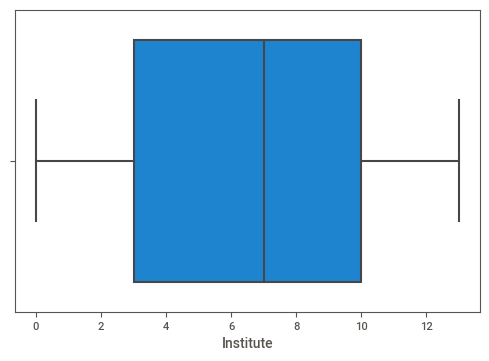

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


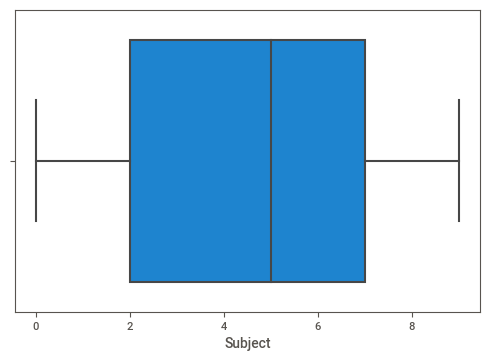

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


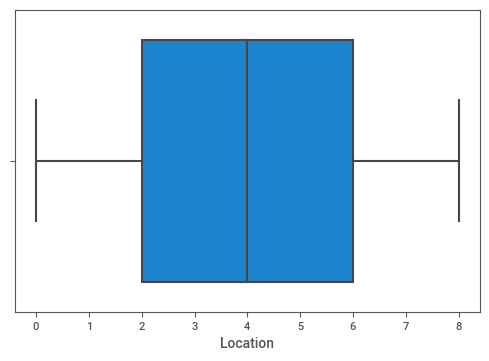

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


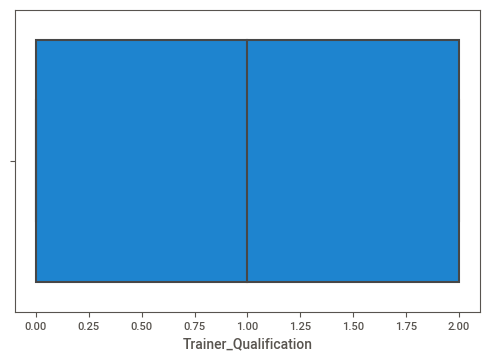

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


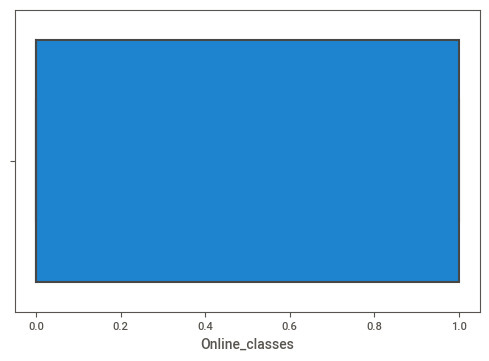

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


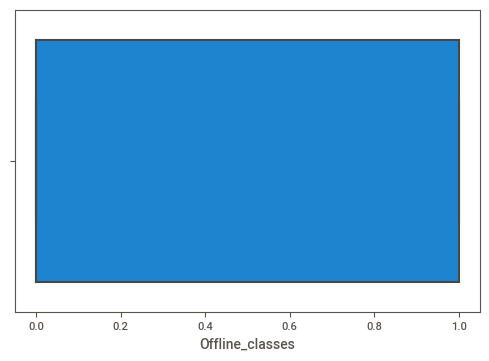

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


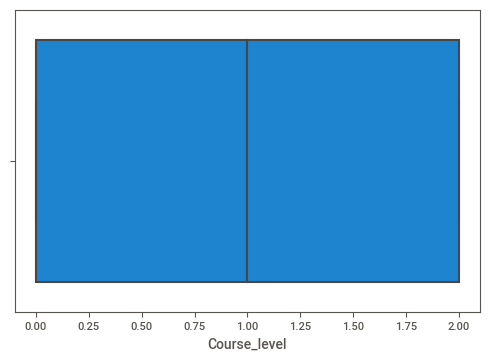

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


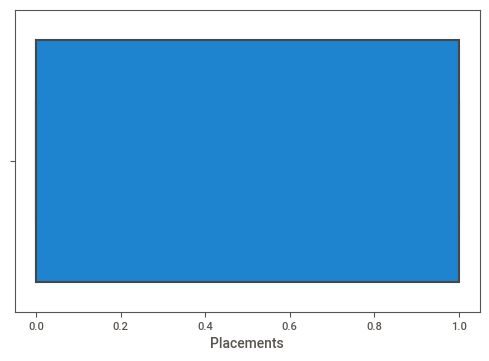

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


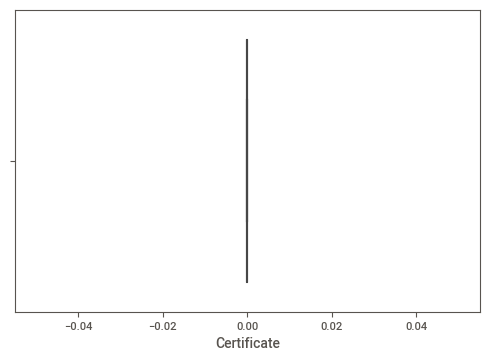

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


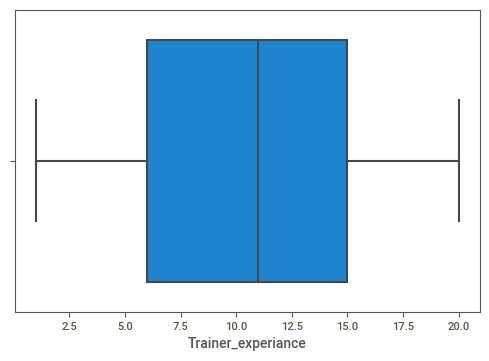

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


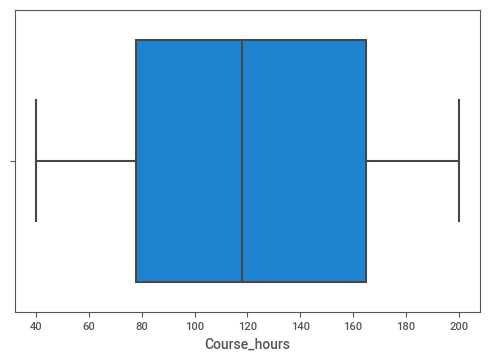

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


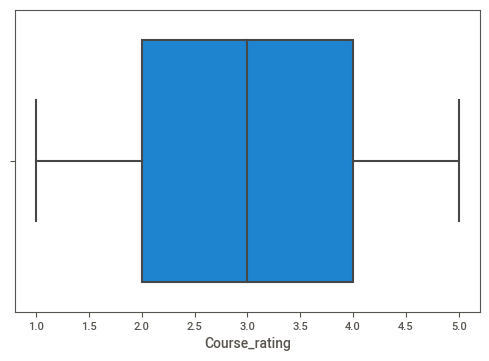

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


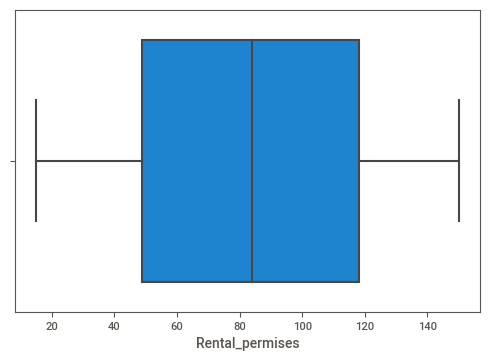

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


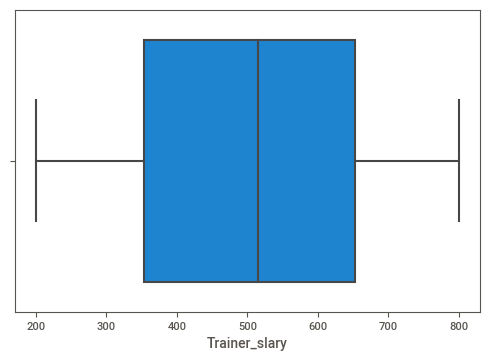

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


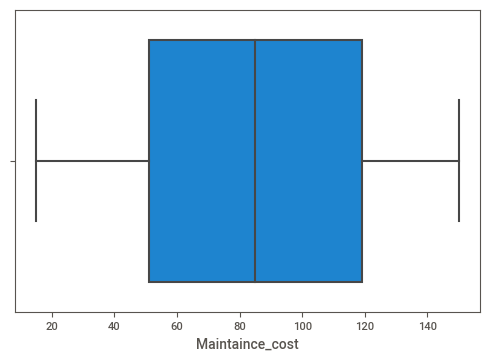

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


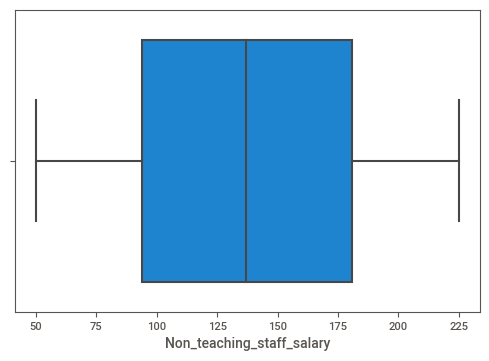

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


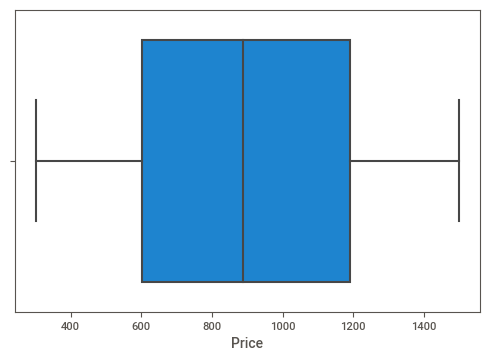

In [ ]:
cols = ['Institute', 'Subject', 'Location', 'Trainer_Qualification',
       'Online_classes', 'Offline_classes', 'Course_level', 'Placements',
       'Certificate', 'Trainer_experiance', 'Course_hours', 'Course_rating',
       'Rental_permises', 'Trainer_slary', 'Maintaince_cost',
       'Non_teaching_staff_salary', 'Price']

## check ing outliers
import seaborn as sns
import matplotlib.pyplot as plt

for i in cols:
    sns.boxplot(data[i]); plt.show() 

* No outliers

In [ ]:
# Checking variance #
data.var()

Institute                        16.826245
Subject                           8.763737
Location                          6.746456
Trainer_Qualification             0.649945
Online_classes                    0.247728
Offline_classes                   0.249909
Course_level                      0.657346
Placements                        0.250324
Certificate                       0.000000
Trainer_experiance               30.425482
Course_hours                   2255.547924
Course_rating                     1.482137
Rental_permises                1532.557346
Trainer_slary                 30434.592308
Maintaince_cost                1519.115972
Non_teaching_staff_salary      2567.271523
Price                        118210.217499
dtype: float64

In [ ]:
## Certificate column has zero variance, so drop it
data.drop(['Certificate'], axis = 1, inplace = True)
data.columns

Index(['Institute', 'Subject', 'Location', 'Trainer_Qualification',
       'Online_classes', 'Offline_classes', 'Course_level', 'Placements',
       'Trainer_experiance', 'Course_hours', 'Course_rating',
       'Rental_permises', 'Trainer_slary', 'Maintaince_cost',
       'Non_teaching_staff_salary', 'Price'],
      dtype='object')

In [ ]:
data.shape

(525, 16)

In [ ]:
# Regression model
import statsmodels.formula.api as smf 
         
ml1 = smf.ols('Price ~ Institute + Subject + Location + Trainer_Qualification + Online_classes + Offline_classes + Course_level + Course_hours + Course_rating + Rental_permises + Trainer_slary + Maintaince_cost + Non_teaching_staff_salary + Placements', data = data).fit() # regression model

# Summary
ml1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     3354.
Date:                Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:08:15   Log-Likelihood:                -2620.5
No. Observations:                 525   AIC:                             5271.
Df Residuals:                     510   BIC:                             5335.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    64.3284     13.243      4.858      0.000      38.311      90.346
Institute                     0.7490      0.394      1.899      0.058      -0.026       1.524
Subject                      -0.3616      0.556     -0.650      0.516      -1.455       0.731
Location                      0.3169      0.623      0.509      0.611      -0.907       1.541
Trainer_Qualification         1.4185      2.017      0.703      0.482      -2.544       5.381
Online_classes               -0.0601      3.233     -0.019      0.985      -6.411       6.291
Offline_classes              -4.1354      3.212     -1.287      0.199     -10.446       2.175
Course_level                  1.8705      1.994      0.938      0.349      -2.046       5.787
Course_hours                  1.8423      0.252      7.321      0.000       1.348       2.337
Course_rating                 5.2488      4.940      1.063      0.288      -4.456      14.954
Rental_permises               3.6064      0.467      7.723      0.000       2.689       4.524
Trainer_slary                 0.0805      0.074      1.082      0.280      -0.066       0.227
Maintaince_cost               0.2670      0.271      0.986      0.324      -0.265       0.799
Non_teaching_staff_salary     1.6797      0.160     10.468      0.000       1.364       1.995
Placements                   -1.1023      3.211     -0.343      0.731      -7.410       5.205
==============================================================================
Omnibus:                      275.332   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10473.592
Skew:                           1.613   Prob(JB):                         0.00
Kurtosis:                      24.642   Cond. No.                     4.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* p-values of few columns(Subject,Location, Trainer_Qualification, online_class, offline_class,Course_level,Course_rating, Trainer_salary, Maintence_cost, placements) are more than 0.05(5%) and remaining are less than 0.05(5%)

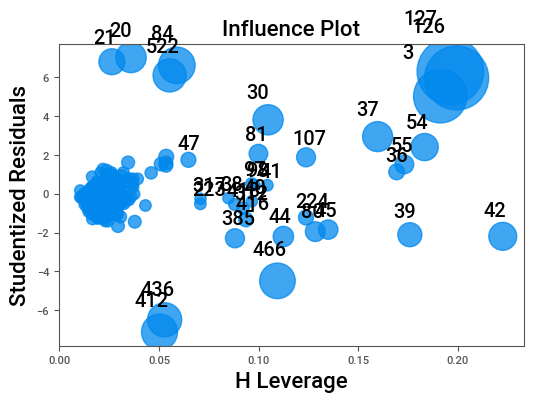

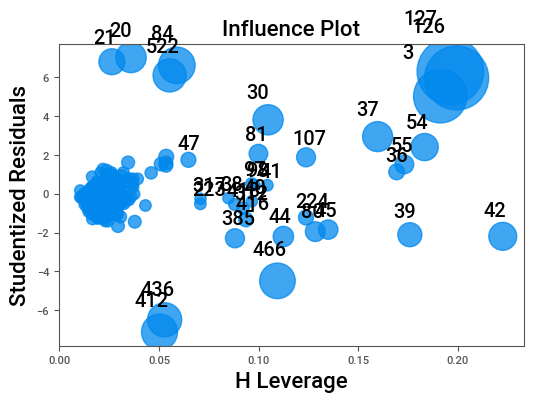

In [ ]:
# Checking whether data has any influential values 
# Influence Index Plots
import statsmodels.api as sm

sm.graphics.influence_plot(ml1)
# Studentized Residuals = Residual/standard deviation of residuals

* From my observation no influencer points.

In [ ]:
# Check for Colinearity to decide to remove a variable using VIF (variance influcence factor)
# Assumption: VIF > 10 = colinearity exist :VIF= (1/1-R^2)
# calculating VIF's values of independent variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[list(data.select_dtypes(include = ['int64', 'float64']).columns)]

# Profit feature is dependent or out put feature so we are deleting
X = X.drop('Price', axis = 1)

## VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

## calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]
print(vif_data)


                      feature         VIF
0                   Institute    3.727864
1                     Subject    3.675821
2                    Location    3.247619
3       Trainer_Qualification    2.574542
4              Online_classes    1.874597
5             Offline_classes    1.975294
6                Course_level    2.758563
7                  Placements    2.004485
8          Trainer_experiance  206.645226
9                Course_hours  511.338172
10              Course_rating   94.529550
11            Rental_permises  469.894176
12              Trainer_slary  341.113548
13            Maintaince_cost  257.458984
14  Non_teaching_staff_salary  206.160549


* VIF of few columns are less than 10, and few are greater than 10.

### Split the data set into train and test

In [ ]:
# Split the data set into train(80% of the data) and test(20% of the data)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop("Price", axis = 1), data.Price, test_size = 0.2, random_state = 42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(420, 15)
(420,)
(105, 15)
(105,)


# Model Building

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
rmse =lambda y, y_hat: np.sqrt(mean_squared_error(y, y_hat))

lm = LinearRegression()
lm.fit(x_train, y_train)

lm_preds = lm.predict(x_test)
rmse(y_test, lm_preds)

52.15919562049208

In [ ]:
lm.fit(x_train, y_train)

y_pred_test = lm.predict(x_test)

result_test = pd.DataFrame({'Actual':y_test, "Predicted": y_pred_test})
result_test.head(10)

,Actual,Predicted
310,425,426.945740
390,1225,1241.015985
6,429,498.877025
184,660,651.249150
78,777,818.861698
407,574,576.571373
524,1187,1223.457670
487,657,650.165254
117,694,681.081107
137,745,752.540374


In [ ]:
## importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score_test = r2_score(y_test, y_pred_test)

print('R2 score(test): ', score_test)
print('Mean squared error(test): ', mean_squared_error(y_test, y_pred_test))
print('Root Mean squared error(test): ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

R2 score(test):  0.9758756217887679
Mean squared error(test):  2720.5816877767597
Root Mean squared error(test):  52.15919562049208


In [ ]:
y_pred_train = lm.predict(x_train)

result_train = pd.DataFrame({'Actual':y_train, "Predicted": y_pred_train})
result_train.head(10)

,Actual,Predicted
220,497,490.318766
69,1041,1055.066995
362,718,708.253007
483,1073,1077.314154
173,1383,1396.157287
352,456,444.577186
231,867,866.687358
211,1212,1260.036716
192,1208,1246.712618
446,589,592.890058


In [ ]:
score_train = r2_score(y_train, y_pred_train)

print('R2 score(train): ', score_train)
print('Mean squared error(train): ', mean_squared_error(y_train, y_pred_train))
print('Root Mean squared error(train): ', np.sqrt(mean_squared_error(y_train, y_pred_train)))

R2 score(train):  0.9916066817263751
Mean squared error(train):  1000.358360676545
Root Mean squared error(train):  31.62844227394933


#### To get best model used as TPOTRegressor optimizer

In [ ]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 2.9 MB/s 
     |████████████████████████████████| 192.9 MB 68 kB/s 
     |████████████████████████████████| 160 kB 51.1 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=d7a33f3a00ec5acdeb3663d1feafb566259f42961d7a1eb4d9da9c6faad96d96
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from tpot import TPOTRegressor
rmse_scorer = make_scorer(rmse, greater_is_better = False)
pipeline_optimizer = TPOTRegressor(
    scoring = rmse_scorer,
    max_time_mins = 60,
    random_state = 42,
    verbosity = 2
    )
pipeline_optimizer.fit(x_train, y_train)

print(pipeline_optimizer.score(x_test, y_test))

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -28.45589406345446

Generation 2 - Current best internal CV score: -27.412176961444196

Generation 3 - Current best internal CV score: -27.412176961444196

Generation 4 - Current best internal CV score: -27.412176961444196

Generation 5 - Current best internal CV score: -27.296301803905045

Generation 6 - Current best internal CV score: -27.296301803905045

Generation 7 - Current best internal CV score: -27.181393300851276

Generation 8 - Current best internal CV score: -27.181393300851276

Generation 9 - Current best internal CV score: -27.181393300851276

Generation 10 - Current best internal CV score: -26.435549981338305

Generation 11 - Current best internal CV score: -26.435549981338305

Generation 12 - Current best internal CV score: -25.630790777859186

Generation 13 - Current best internal CV score: -25.094222700186776

Generation 14 - Current best internal CV score: -25.094222700186776

Generation 15 - Current best internal CV sc

/home/venky/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


In [ ]:
pipeline_optimizer.fitted_pipeline_
pipeline_optimizer.export('Mock.py')

In [ ]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=True, max_features=0.05, min_samples_leaf=19, min_samples_split=17, n_estimators=100)),
    StackingEstimator(estimator=AdaBoostRegressor(learning_rate=1.0, loss="linear", n_estimators=100)),
    StackingEstimator(estimator=RandomForestRegressor(bootstrap=False, max_features=0.9000000000000001, min_samples_leaf=3, min_samples_split=5, n_estimators=100)),
    PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
    ExtraTreesRegressor(bootstrap=False, max_features=0.6500000000000001, min_samples_leaf=1, min_samples_split=4, n_estimators=100)
)

In [ ]:
exported_pipeline.fit(x_train, y_train)

y_pred_test = exported_pipeline.predict(x_test)

result_test = pd.DataFrame({'Actual':y_test, "Predicted": y_pred_test})
result_test.head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


,Actual,Predicted
310,425,423.465000
390,1225,1225.260000
6,429,481.671667
184,660,658.956667
78,777,783.675000
407,574,566.255000
524,1187,1194.250000
487,657,659.916667
117,694,705.350000
137,745,742.508333


In [ ]:
## importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score_test = r2_score(y_test, y_pred_test)

print('R2 score(test): ', score_test)
print('Mean squared error(test): ', mean_squared_error(y_test, y_pred_test))
print('Root Mean squared error(test): ', np.sqrt(mean_squared_error(y_test, y_pred_test)))


R2 score(test):  0.9820236245693243
Mean squared error(test):  2027.2521588359832
Root Mean squared error(test):  45.02501703315595


In [ ]:
y_pred_train = exported_pipeline.predict(x_train)

result_train = pd.DataFrame({'Actual':y_train, "Predicted": y_pred_train})
result_train.head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


,Actual,Predicted
220,497,495.595000
69,1041,1042.810000
362,718,718.516667
483,1073,1072.723333
173,1383,1383.816667
352,456,455.955000
231,867,868.781667
211,1212,1212.893333
192,1208,1209.205000
446,589,589.576667


In [ ]:
score_train = r2_score(y_train, y_pred_train)

print('R2 score(train): ', score_train)
print('Mean squared error(train): ', mean_squared_error(y_train, y_pred_train))
print('Root Mean squared error(train): ', np.sqrt(mean_squared_error(y_train, y_pred_train)))

R2 score(train):  0.9999829693658839
Mean squared error(train):  2.029797592592643
Root Mean squared error(train):  1.4247096520318245


Text(0, 0.5, 'y_pred_test')

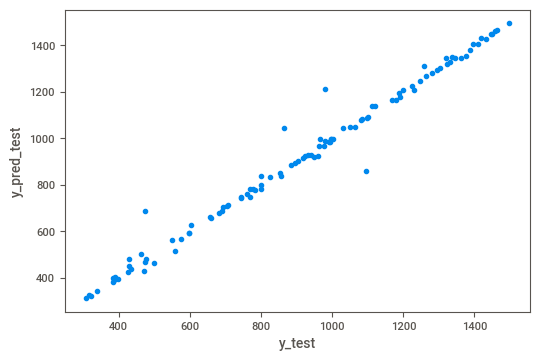

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* Got a linear shape. I hope this is good fit model

## Saving the Model

### Importing the pickle

In [ ]:
import pickle
pickle.dump(exported_pipeline, open('data_model.pkl', 'wb'))

In [ ]:
# Load the model from disk
model = pickle.load(open('data_model.pkl', 'rb'))
print(model.predict([[9,2,4,1,0,0,1,1,15,162,4,121,655,120,182]]))

[1190.43666667]


/home/venky/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


* Model predict the course price correctly  based on features(15).